# Run Ad-Hoc Data Bias Analysis

## Run Bias Analysis In The Notebook using `smclarify`
https://github.com/aws/amazon-sagemaker-clarify


In [3]:
!pip install -U scikit-learn

In [6]:
!pip install scikit-learn

In [7]:
pip install smclarify==0.1

  Using cached smclarify-0.1-py3-none-any.whl (24 kB)
  Using cached s3fs-2023.1.0-py3-none-any.whl (27 kB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the enviro

In [8]:
!pip install smclarify

  Using cached s3fs-2023.1.0-py3-none-any.whl (27 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 17.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.5/139.5 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 26.0 MB/s eta 0:00:00
INFO: pip is still looking at multiple versions of aiobotocore to determine which version is compatible with other requirements. This could take a whil

In [3]:
from smclarify.bias import report
from typing import Dict
from collections import defaultdict
import pandas as pd
import seaborn as sns

# Read Dataset From S3

In [10]:
%store -r bias_data_s3_uri

In [11]:
print(bias_data_s3_uri)

s3://sagemaker-eu-west-2-123137613716/bias-detection-1708207952/amazon_reviews_us_giftcards_software_videogames.csv


In [12]:
%store -r balanced_bias_data_s3_uri

In [13]:
print(balanced_bias_data_s3_uri)

s3://sagemaker-eu-west-2-123137613716/bias-detection-1708207952/amazon_reviews_us_giftcards_software_videogames_balanced.csv


In [14]:
!aws s3 cp $bias_data_s3_uri ./data-clarify/

download: s3://sagemaker-eu-west-2-123137613716/bias-detection-1708207952/amazon_reviews_us_giftcards_software_videogames.csv to data-clarify/amazon_reviews_us_giftcards_software_videogames.csv


In [15]:
!aws s3 cp $balanced_bias_data_s3_uri ./data-clarify/

download: s3://sagemaker-eu-west-2-123137613716/bias-detection-1708207952/amazon_reviews_us_giftcards_software_videogames_balanced.csv to data-clarify/amazon_reviews_us_giftcards_software_videogames_balanced.csv


# Analyze Unbalanced Data

In [4]:
df = pd.read_csv("./data-clarify/amazon_reviews_us_giftcards_software_videogames.csv")
df.shape

(396601, 15)

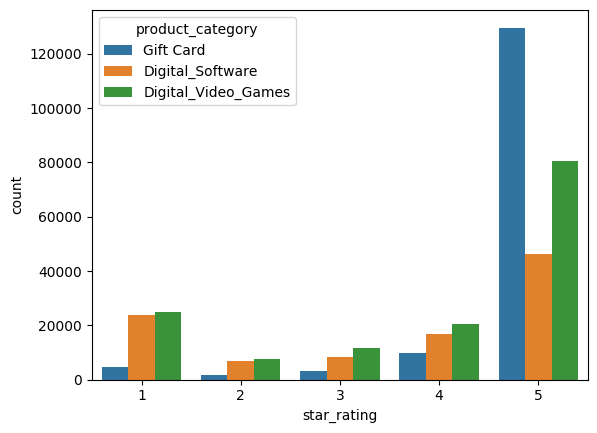

In [17]:
sns.countplot(data=df, x="star_rating", hue="product_category")

# Calculate Bias Metrics on Unbalanced Data

## Define 
* Facet Column (= Product Category), 
* Label Column (= Star Rating), 
* Positive Label Value (= 5,4)

#### Change to Series for Star Rating here 

In [25]:
facet_column = report.FacetColumn(name="product_category")

label_column = report.LabelColumn(
    name="star_rating", 
    series=df["star_rating"], 
    positive_label_values=[5, 4]
)

## Run SageMaker Clarify Bias Report

In [24]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31


In [26]:
report.bias_report(
    df=df, 
    facet_column=facet_column, 
    label_column=label_column, 
    stage_type=report.StageType.PRE_TRAINING, 
    metrics=["CI", "DPL", "KL", "JS", "LP", "TVD", "KS"]
)

[{'value_or_threshold': 'Gift Card',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.24818142163030352},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': -0.2728200784710585},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.06264793087463158},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.33123679025420116},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.2728200784710585},
   {'name': 'LP', 'description': 'L-p Norm (LP)', 'value': 0.385825855061463},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.2728200784710585}]},
 {'value_or_threshold': 'Digital_Software',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.4852055340253807},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportio

# Balance the data

In [5]:
df_grouped_by = df.groupby(["product_category", "star_rating"])[["product_category", "star_rating"]]
df_balanced = df_grouped_by.apply(lambda x: x.sample(df_grouped_by.size().min()).reset_index(drop=True))
df_balanced.shape

(23535, 2)

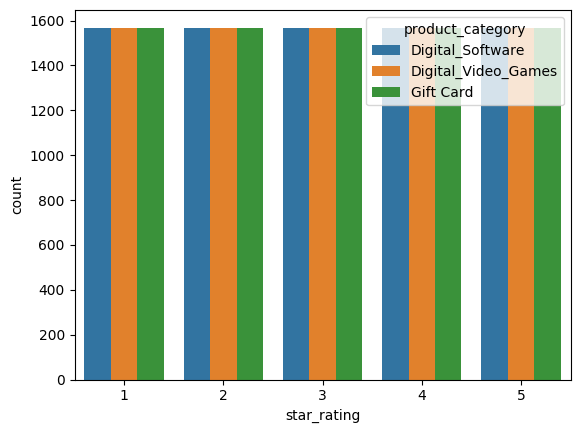

In [6]:
import seaborn as sns

sns.countplot(data=df_balanced, x="star_rating", hue="product_category")

# Calculate Bias Metrics on Balanced Data

## Define 
* Facet Column (= Product Category), 
* Label Column (= Star Rating), 
* Positive Label Value (= 5,4)

In [8]:
from smclarify.bias import report

facet_column = report.FacetColumn(name="product_category")

label_column = report.LabelColumn(
    name="star_rating", 
    series=df_balanced["star_rating"], 
    positive_label_values=[5, 4]
)

## Run SageMaker Clarify Bias Report

In [9]:
report.bias_report(
    df=df_balanced, 
    facet_column=facet_column, 
    label_column=label_column, 
    stage_type=report.StageType.PRE_TRAINING, 
    metrics=["CI", "DPL", "KL", "JS", "LP", "TVD", "KS"]
)

[{'value_or_threshold': 'Digital_Software',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.3333333333333333},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.0},
   {'name': 'JS',
    'description': 'Jensen-Shannon Divergence (JS)',
    'value': 0.0},
   {'name': 'KL',
    'description': 'Kullback-Liebler Divergence (KL)',
    'value': 0.0},
   {'name': 'KS',
    'description': 'Kolmogorov-Smirnov Distance (KS)',
    'value': 0.0},
   {'name': 'LP', 'description': 'L-p Norm (LP)', 'value': 0.0},
   {'name': 'TVD',
    'description': 'Total Variation Distance (TVD)',
    'value': 0.0}]},
 {'value_or_threshold': 'Digital_Video_Games',
  'metrics': [{'name': 'CI',
    'description': 'Class Imbalance (CI)',
    'value': 0.3333333333333333},
   {'name': 'DPL',
    'description': 'Difference in Positive Proportions in Labels (DPL)',
    'value': 0.0},
   {'name': 'JS',
    'description': 'Jense

In [10]:
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>
        
<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(err) {
    // NoOp
}    
</script>

In [11]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>